# Malaria Image Classification with CNN

Bu projede Sıtma hastalığını teşhis etmek için hücre resimlerini tanıyan bir model geliştiriyoruz.

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [96]:
img_path="cell_images/"
labels = ['Uninfected', 'Parasitized']

In [4]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        i=0
        for img_file in os.listdir(dir+label):
            i+=1
            img_list.append(dir+label+"/"+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [21]:
df=set_df(img_path)

In [22]:
d={"Parasitized":1, "Uninfected":0}
df["encode_label"]= df["label"].map(d)

In [95]:
df.head(10)

,img,label,encode_label
0,cell_images/Parasitized/C72P33_ThinF_IMG_20150...,Parasitized,1
1,cell_images/Parasitized/C184P145ThinF_IMG_2015...,Parasitized,1
2,cell_images/Uninfected/C160P121ThinF_IMG_20151...,Uninfected,0
3,cell_images/Uninfected/C226ThinF_IMG_20151112_...,Uninfected,0
4,cell_images/Parasitized/C82P43ThinF_IMG_201508...,Parasitized,1
5,cell_images/Uninfected/C236ThinF_IMG_20151127_...,Uninfected,0
6,cell_images/Parasitized/C183P144NThinF_IMG_201...,Parasitized,1
7,cell_images/Parasitized/C51AP12thinF_IMG_20150...,Parasitized,1
8,cell_images/Parasitized/C153P114ThinF_IMG_2015...,Parasitized,1
9,cell_images/Parasitized/C101P62ThinF_IMG_20150...,Parasitized,1


In [60]:
# Veri setini biraz karıştıralım
df=df.sample(frac=1).reset_index(drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27558 entries, 0 to 27557
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img           27558 non-null  object
 1   label         27558 non-null  object
 2   encode_label  27558 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 646.0+ KB


In [55]:
df["label"].value_counts()

label
Parasitized    13779
Uninfected     13779
Name: count, dtype: int64

In [62]:
image=cv2.imread(str(df["img"][10]))
image.shape

(145, 148, 3)

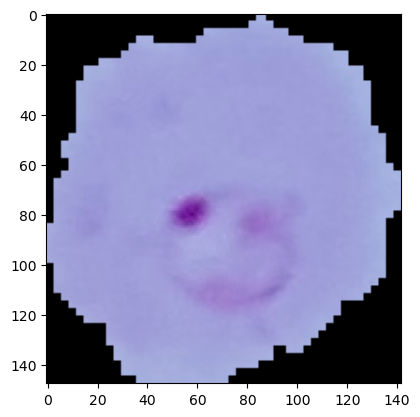

In [26]:
plt.imshow(image)

In [63]:
size=128
x=[]
for image in df["img"]:
    try:
    img=cv2.imread(str(image))
    img=cv2.resize(img, (size,size))
    img=img/255.0
    x.append(img)
    except Exception as e:
        print(f"Hata: {e}")
        print(f"Hatalı resmin yolu: {image}")
# Burada hata verince hangi resim olduğunu anlamak istedim. Meğer hata resimde değil Thumb.db dosyalarındaymış. 
# Onları silip yeniden çalıştırdım. 

In [64]:
x=np.array(x)

In [65]:
y=df['encode_label']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

## Modelleme

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [68]:
model=Sequential()
model.add(Input(shape=(size,size,3)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=.5))
model.add(Dense(2, activation='softmax'))
#categorical_crossentropy
#sparse_categorical_crossentropy
#binary_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
len(x_train), len(y_train)

(22046, 22046)

In [70]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10, verbose=1)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 100ms/step - accuracy: 0.7319 - loss: 0.6103 - val_accuracy: 0.8676 - val_loss: 0.3273
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.8896 - loss: 0.2937 - val_accuracy: 0.6065 - val_loss: 0.6219
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.9200 - loss: 0.2283 - val_accuracy: 0.9104 - val_loss: 0.2622
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9295 - loss: 0.2031 - val_accuracy: 0.8661 - val_loss: 0.3530
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9357 - loss: 0.1850 - val_accuracy: 0.8336 - val_loss: 0.5030
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.9387 - loss: 0.1813 - val_accuracy: 0.9468 - val_loss: 0.1775
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9495 - loss: 0.1493 - val_accuracy: 0.9332 - val_loss: 0.2045
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9526 - loss: 0.1408 -

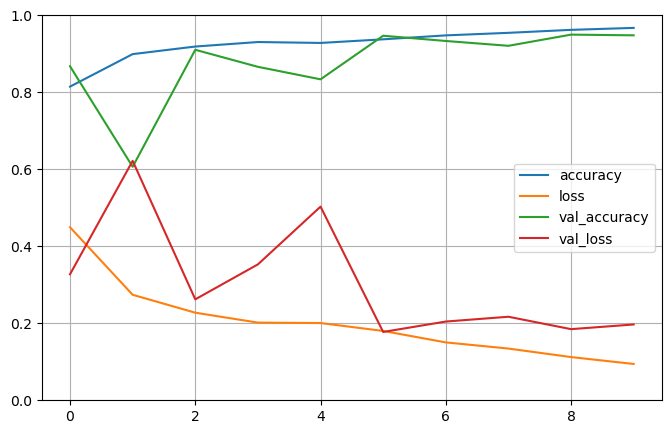

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
loss, accuracy = model.evaluate(x_test, y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9482 - loss: 0.1979


In [73]:
accuracy

0.9479317665100098

In [74]:
pred = model.predict(x_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [75]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [76]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[2707,   87],
       [ 200, 2518]], dtype=int64)

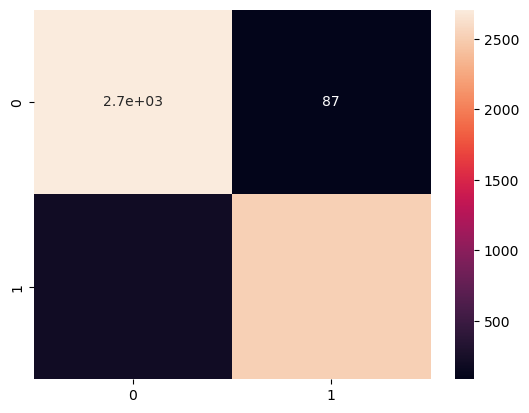

In [77]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [78]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2794
           1       0.97      0.93      0.95      2718

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



In [79]:
model.save('malaria_cnnmodel.h5')

In [85]:
image=cv2.imread(str(df["img"][150]))
print(df["img"][150])
image.shape

cell_images/Parasitized/C132P93ThinF_IMG_20151004_151811_cell_165.png


(127, 124, 3)

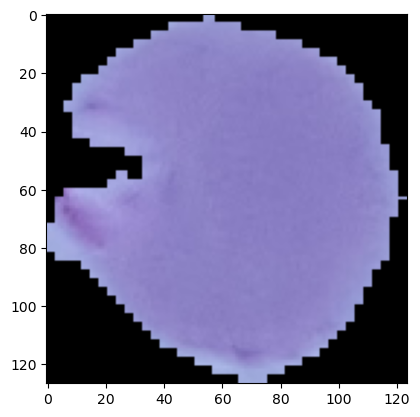

In [86]:
plt.imshow(image)

In [88]:
image=cv2.resize(image, (size,size))
image=image/255.0

In [89]:
image=np.array(image)

In [91]:
image=np.expand_dims(image, axis=0)

In [97]:
tahmin=model.predict(image)
labels[np.argmax(tahmin)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'Parasitized'

## Sonuç

Bu projede Sıtma hastalığını teşhis etmek için hücre resimlerini sınıflandıram derin öğrenme modeli geliştirildi.